In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['testset.csv', 'trainset.csv']


In [2]:
dataset_train = pd.read_csv("../input/trainset.csv")

In [3]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [4]:
trainset = dataset_train.iloc[:,1:2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [7]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [8]:
x_train = []
y_train = []

In [9]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train.shape

(1199, 60)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [14]:
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [20]:
regressor.fit(x_train,y_train,epochs = 150, batch_size = 32)

Epoch 1/150
1199/1199 [==============================] - 14s 12ms/step - loss: 0.0510
Epoch 2/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 3/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0040
Epoch 4/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0045
Epoch 5/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0037
Epoch 6/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0034
Epoch 7/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0033
Epoch 8/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0030
Epoch 9/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0032
Epoch 10/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0032
Epoch 11/150
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0037
Epoch 12/150
1199/1199 [==============================] - 10s 

In [21]:
dataset_test =pd.read_csv("../input/testset.csv")

In [22]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
5       363.769043
6       369.014923
7       368.602600
8       366.118744
9       357.340851
10      358.865936
11      356.536072
12      352.884827
13      350.053253
14      365.617004
15      368.225037
16      372.959259
17      373.451050
18      370.962250
19      374.434662
20      372.830109
21      376.650238
22      381.364594
23      378.105774
24      377.082428
25      382.363098
26      387.544403
27      386.684998
28      388.349152
29      387.544403
          ...     
95     1061.859985
96     1074.060059
97     1083.560059
98     1065.130005
99     1079.000000
100    1079.020020
101    1064.890015
102    1063.030029
103    1067.560059
104    1099.349976
105    1122.329956
106    1140.989990
107    1142.170044
108    1131.319946
109    1118.180054
110    1118.599976
111    1131.069946
112    1141.119995
113    1143.849976
114    1148.859985
115    1143.650024
116    1158.

In [24]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [25]:
inputs = inputs.reshape(-1,1)

In [26]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [27]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [28]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [29]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [31]:
predicted_price = regressor.predict(x_test)

In [32]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1066.7178],
       [1065.3998],
       [1070.4993],
       [1083.2815],
       [1094.4873],
       [1102.3344],
       [1108.1803],
       [1107.4866],
       [1108.5393],
       [1109.6653],
       [1120.5352],
       [1128.3994],
       [1133.1744],
       [1135.584 ],
       [1138.6946],
       [1148.4501],
       [1162.0349],
       [1169.496 ],
       [1172.7708],
       [1174.8071],
       [1174.0642],
       [1174.4116],
       [1173.4371],
       [1160.5237],
       [1139.5474],
       [1105.7948],
       [1099.0798],
       [1097.5165],
       [1082.8545],
       [1077.4469],
       [1076.5392],
       [1076.8495],
       [1085.7238],
       [1095.6831],
       [1101.0266],
       [1107.0966],
       [1114.2124],
       [1117.6428],
       [1123.5221],
       [1132.7388],
       [1133.722 ],
       [1127.0044],
       [1104.3217],
       [1093.5701],
       [1101.445 ],
       [1108.0787],
       [1117.9152],
       [1130.7017],
       [1147.0609],
       [1159.0779],


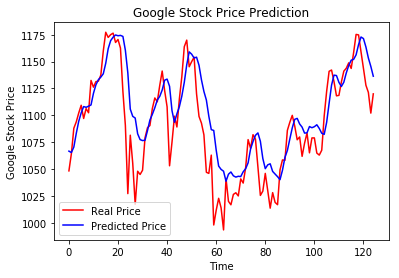

In [33]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()